# Python for Data Science

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI-Core/Python-for-Data-Science/blob/main/Part%204%20-%20Model%20Training%20%26%20Evaluation.ipynb)


In [9]:
import pandas as pd
df = pd.read_csv(
    "https://raw.githubusercontent.com/AI-Core/Python-for-Data-Science/main/part-3-output.csv")


In [10]:
# dropping non significant columns from X and the target column
X = df
y = df.pop('m13') #pop not drop lol


In [11]:
X = X.drop(labels=[
    "Unnamed: 0",
    "Unnamed: 0.1",
    "financial_institution",
    "origination_date",
    "first_payment_date",
    "loan_id" #remove cos it isn't a real number
    #leave source and loan_purpose can do one_hot encoding
],axis=1)

In [12]:
# apply one-hot encoding to nominal variables
X = pd.get_dummies(data=X, columns=['source', 'loan_purpose'])

In [13]:
# apply normalisation using sklearn
from sklearn.preprocessing import MinMaxScaler
normalisation = MinMaxScaler()


## The Problem

__Loan default prediction__ is one of the most critical and crucial problems faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of _non–performing_ loans which results in a jeopardizing effect on the growth of these institutions. 

Therefore, to maintain a healthy portfolio, banks put stringent monitoring and evaluation measures in place to ensure the timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. _Delinquency_ occurs when a borrower misses a payment against his/her loan.

Given the information like mortgage details, borrowers-related details, and payment details, your objective is to build a system that can predict the defaulter status of loans for the next month given the defaulter status for the previous 12 months (in the number of months).



# Part 4 - Model Training and Evaluation

Now, it's time to do some machine learning.
You have your final training and testing data, and you're ready to start training different some machine learning models to model the relationships between the features and labels.

## Train Test Split

The final thing required before training a machine learning model on our data is to split the data into different sets.
training and testing for model training and evaluation. 

You can learn more about why we perform train and test splitting [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify to have same ratio in train and test split for target column

Alright, so we are getting closer to training our mdodel. This notebook was just focussed around preparing the data before we actually train the model. We did Feature Selection, Feature Encoding and then Feature Scaling. It is important to notice the flow of the preprocessing steps. It should most likely happen in this manner if not always.

### Model Training 

We will be training different models and see which works best. 
1. Logistic Regression : For this model, how to prepare the data w.r.t outliers, feature scaling and feature encoding ? 
2. Decision Tree : How to prepare the data for this model ? Is it robust to outliers ? 
3. Random Forest : [Read More Here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
4. SVM : [Read More Here](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.)
5. Boosting Models: GradientBoostingClassifier(), ExtraTreesClassifier()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [16]:
# Train Logistic Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

These metrics help us understand which model works better over others. You can learn more about the metrics here: [Link](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=They're%20used%20to%20train,t%20need%20to%20be%20differentiable.)
1. Accuracy : Is Accuracy as a metric relavant here ?
2. Precision : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
3. Recall : [Read More](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
4. Confusion Matrix

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score
pred = model.predict(X_test)
print (f"The accuracy is {accuracy_score(y_test, pred)}")

The accuracy is 0.9945143316675283


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


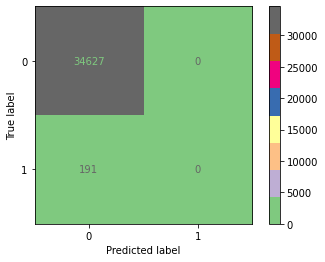

In [18]:
plot_confusion_matrix(model,X_test, y_test, cmap='Accent')

In [19]:
print("Classification report:")
print(classification_report(pred, y_test))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     34818
           1       0.00      0.00      0.00         0

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       1.00      0.99      1.00     34818



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Implement a __evaluation()__ function to evaluate the metrics mentioned above 

In [20]:
def evaluate(model, verbose=False):
    """
    Set verbose = True to print accuracy, classification report and plot
    confusion matrix
    """
    metrics = {}
    pred = model.predict(X_test)
    metrics['accuracy'] = accuracy_score(y_test, pred)
    verbose and print (f"The accuracy is {metrics['accuracy']}")
    verbose and plot_confusion_matrix(model,X_test, y_test)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    verbose and print (f"The classification report looks like : \n {classification_report(pred, y_test)}")
    return metrics
    

The accuracy is 0.9958929289447986


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The classification report looks like : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     34726
           1       0.37      0.76      0.49        92

    accuracy                           1.00     34818
   macro avg       0.68      0.88      0.75     34818
weighted avg       1.00      1.00      1.00     34818



{'accuracy': 0.9958929289447986,
 'precision': 0.7608695652173914,
 'recall': 0.36649214659685864}

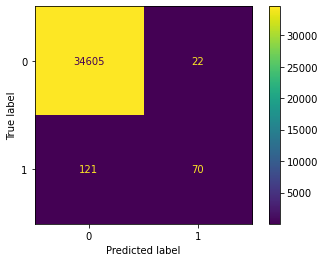

In [21]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
evaluate(random_forest, verbose = True)


In [22]:
output = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall'])

def train_model(model):
    global output
    model.fit( X_train, y_train) #X_train and y_train are used globally
    metrics = evaluate(model)
    metrics["model"] = f"{model}"
    output = output.append(metrics, ignore_index=True)
    

In [23]:
for model in [RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), KNeighborsClassifier()]:
    print (f"Training model: {model}" )
    train_model(model)
    

Training model: RandomForestClassifier()
Training model: GradientBoostingClassifier()
Training model: ExtraTreesClassifier()
Training model: KNeighborsClassifier()


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
output

,model,accuracy,precision,recall
0,RandomForestClassifier(),0.995835,0.755556,0.356021
1,GradientBoostingClassifier(),0.995807,0.731959,0.371728
2,ExtraTreesClassifier(),0.995634,0.705263,0.350785
3,KNeighborsClassifier(),0.994514,0.000000,0.000000


If we consider __Recall__ `GradientBoostinClassifier` is working better than other models in default configuration. Lets improve the function to automatically determine the best model

In [25]:
output = pd.DataFrame(columns=['model','accuracy','precision','recall'])

def train_model(model):
    global output
    model.fit( X_train, y_train) #X_train and y_train are used globally
    metrics = evaluate(model)
    metrics["model"] = f"{model}"
    output = output.append(metrics, ignore_index=True)

def select_best(model_list):
    for model in model_list:
        print ("Training Model: ", model)
        train_model(model)
    output.recall = output.recall.astype('float64')
    print (f"The best model is \n { output.loc[[output.recall.argmax()]]}")

In [26]:
select_best([
    RandomForestClassifier(),
    GradientBoostingClassifier(), 
    ExtraTreesClassifier(), 
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC() 
])

Training Model:  RandomForestClassifier()
Training Model:  GradientBoostingClassifier()
Training Model:  ExtraTreesClassifier()
Training Model:  KNeighborsClassifier()


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Model:  LogisticRegression()


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Model:  SVC()
The best model is 
                           model  accuracy  precision    recall
1  GradientBoostingClassifier()  0.995807   0.731959  0.371728


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
output

,model,accuracy,precision,recall
0,RandomForestClassifier(),0.995807,0.758621,0.345550
1,GradientBoostingClassifier(),0.995807,0.731959,0.371728
2,ExtraTreesClassifier(),0.995577,0.679612,0.366492
3,KNeighborsClassifier(),0.994514,0.000000,0.000000
4,LogisticRegression(),0.994514,0.000000,0.000000
5,SVC(),0.994514,0.000000,0.000000


In [35]:
from sklearn.metrics import precision_recall_fscore_support
models_classification_reports = pd.DataFrame(columns=['model', 'accuracy','precision','recall'])

model_list = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(), 
    SVC()
]

best_score = 0
best_prsf = []

for model in model_list:
  model.fit(X_train, y_train)
  #model.fit(X_val, y_val)
  pred = model.predict(X_test)
  stat_values = list(precision_recall_fscore_support(y_test, pred, zero_division=0)) #change to list cos cant append tuple
  s = models_classification_reports.shape[0]
  models_classification_reports.loc[s, 'model'] = f"{model}"
  models_classification_reports.loc[s, 'accuracy'] = accuracy_score(y_test, pred) #accuracy score val in accuracy col
  models_classification_reports.loc[s, 'precision'] = stat_values[0][1] #precision val in precision col
  #precision gets smaller as more false positives
  models_classification_reports.loc[s, 'recall'] = stat_values[1][1] #recall val in recall col
  #recall gets smaller as more false negatives
  #models_classification_reports.loc[s, 'f1-score'] = stat_values[2][1] #f1-score val in f1-score col
  if model.score(X_test, pred) > best_score:
    best_score = model.score(X_test, pred)
    best_model = f"{model}"
    best_prfs = stat_values

print(models_classification_reports)
print("the best model is: ", best_model)
print("with score: ", best_score)
print("and precision, recall, fscore and support values: ", best_prsf)

                          model  accuracy precision    recall
0      RandomForestClassifier()  0.995778  0.744444  0.350785
1  GradientBoostingClassifier()  0.995807  0.731959  0.371728
2        ExtraTreesClassifier()  0.995778   0.73913  0.356021
3        KNeighborsClassifier()  0.994514       0.0       0.0
4          LogisticRegression()  0.994514       0.0       0.0
5                         SVC()  0.994514       0.0       0.0
the best model is:  RandomForestClassifier()
with score:  1.0
and precision, recall, fscore and support values:  []


In [28]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

### Saving the Model

So you're happy with your model? Now you need to save it.

Once it's saved, we can share it with our team, load it back in to make predictions in some other system, or load it back in to compare with new models that you train, for example.

In [29]:
import joblib 
filename = 'finalized_model.pkl'
joblib.dump(model, filename)


['finalized_model.pkl']

## Key Takeaways
- The process for model training and evaluation goes as follows
    - Train a model on the training set
    - Evaluate the model on the validation set
    - Repeat for as many variations of model as you can
    - Select the best model based on its performance on the validation set
    - Report the performance of the model using the test set, but do not use this to make any decisions about the model!
- Never use the test set to choose between models. The moment you pick a model based on test set performance, you're showing it the answers!
- Both the validatoin and test set are a measure of how well the model will generalise to unseen examples
- The validation set is used to compare different models and choose between them once they've been trained
- The difference 
- This demo barely scratches the surface. Going forward, you could explore:
    - the settings of the different models we've experimented with, which are known as hyperparameters
    - other machine learning models, such as deep learning models like neural networks
    - other machine learning libraries, like Apache Spark's MLLib
    - other preprocessing techniques
